In [1]:
from utils import *
from MySolution import MyClassifier_OvA, MyClustering, MyLabelSelection, MyFeatureSelection, MyClassification_SVMLinear, MyClassifier_OvO

%load_ext autoreload
%autoreload 2

Synthetic data shape:  (1000, 2) (1000,)


Text(0, 0.5, 'x2')

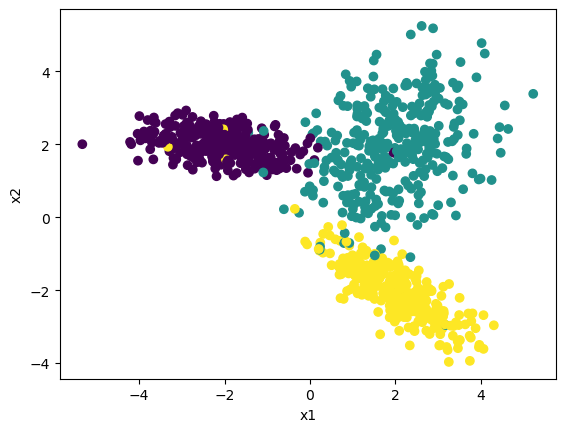

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
plt.xlabel("x1")
plt.ylabel("x2")

# Synthetic Data Training & Testing 

In [25]:
batch_size, feature_dim = syn_data['trainX'].shape
print(f"batch size = {batch_size}, feature_dim = {feature_dim}")
clf1_OvO = MyClassifier_OvO(num_class=3)
SVM_kernel = MyClassification_SVMLinear(num_classes=3)
# Training
OvO_clfs = clf1_OvO.train(syn_data['trainX'], syn_data['trainY'])   # One vs One
SVM_clfs = SVM_kernel.train(syn_data['trainX'], syn_data['trainY']) # External reference

batch size = 1000, feature_dim = 2
Class 0 and 1:
Optimal weights (w): [-1.85034681  0.11484851]
Optimal bias (b): -0.4761808290607632
Class 0 and 2:
Optimal weights (w): [-0.00400009  1.07392608]
Optimal bias (b): -0.40923458913000643
Class 1 and 2:
Optimal weights (w): [1.13066619 2.03879565]
Optimal bias (b): -0.5970880257454422


In [26]:
# Testing
from sklearn.metrics import normalized_mutual_info_score, accuracy_score
pred_Y_OvO = clf1_OvO.predict(syn_data['testX'])
pred_Y_SVM = SVM_kernel.predict(syn_data['testX'])

acc_score_OvO = accuracy_score(y_true=syn_data['testY'], y_pred=pred_Y_OvO)
acc_score_SVM = accuracy_score(y_true=syn_data['testY'], y_pred=pred_Y_SVM)

print(f"accuracy score OvO = {acc_score_OvO}")
print(f"accuracy score external reference SVM = {acc_score_SVM}")

accuracy score OvO = 0.978
accuracy score external reference SVM = 0.978


In [30]:
print(OvO_clfs[(0,1)][0])

[-1.85034681  0.11484851]


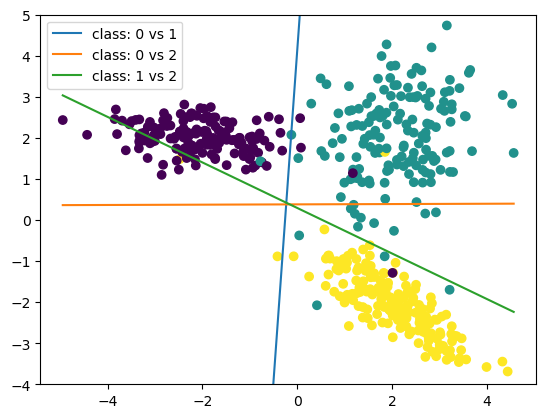

In [33]:
# Visualize the testing points
plt.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=syn_data['testY'])

# Visualize the decision boundaries (db)
keys = OvO_clfs.keys()
for key in keys:
    W, b = OvO_clfs[key]
    x1 = np.linspace(min(syn_data['testX'][:, 0]), max(syn_data['testX'][:, 0]), 100)
    x2 = -(W[0]*x1 + b)/W[1]
    plt.plot(x1, x2, label=f"class: {int(key[0])} vs {int(key[1])}")
plt.ylim([-4, 5])
plt.legend()

# Fasion - MNIST Data Training & Testing

MNIST data shape:  (1000, 784) (1000,)


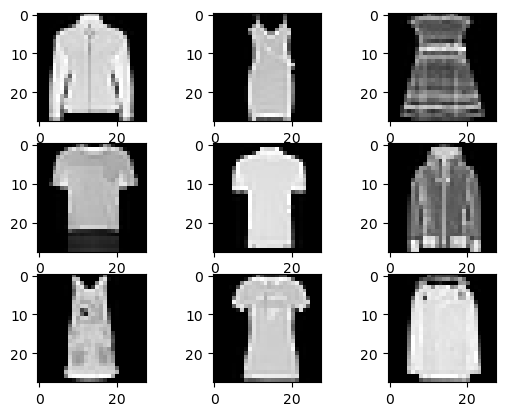

In [19]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [20]:
batch_size, feature_dim = mnist_data['trainX'].shape
print(f"batch size = {batch_size}, feature_dim = {feature_dim}")
clf2_OvO = MyClassifier_OvO(num_class=3)
SVM_clfs = MyClassification_SVMLinear(num_classes=3)
# Training
OvO_clfs = clf2_OvO.train(mnist_data['trainX'], mnist_data['trainY'])
SVM_clfs.train(mnist_data['trainX'], mnist_data['trainY'])


batch size = 1000, feature_dim = 784


/Users/brucequ/miniforge3/envs/deeplearning2/lib/python3.8/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Class 0 and 1:
Optimal weights (w): [ 3.79377974e-16  4.20653564e-16  4.27616314e-14  4.26304482e-14
  6.10936660e-12  5.67478663e-12  1.01427115e-11  7.64534406e-11
 -1.97189344e-08 -1.36598303e-11  8.49326285e-11  2.64177070e-03
  7.94253715e-11 -8.77528151e-03 -6.03868787e-11 -2.95140630e-11
  1.04442860e-10 -1.56532212e-10  8.77059116e-04  1.56683992e-03
  8.35240756e-10  2.49173017e-11  5.47673847e-12  4.99285484e-12
  4.55902321e-15  3.09611364e-16 -1.49798038e-16  1.14677624e-16
  4.58726584e-17  4.49473502e-16 -7.82039714e-16  5.32525253e-13
  5.35174245e-12  2.94777663e-11 -9.75242406e-11  1.18589433e-10
 -1.26641824e-03  2.05115774e-04  3.15043378e-04 -4.51620896e-03
  8.65370781e-11  4.08275503e-03  1.44511625e-03  1.57754684e-10
  3.80057932e-11  1.17033134e-10  1.19072009e-03 -2.11504861e-10
  3.56999783e-03  4.87265520e-11  5.36131003e-11  5.14988538e-12
  4.69583876e-14  5.51759262e-15  4.42562675e-16  4.08153837e-16
  8.98739296e-17  5.78120352e-17  8.27494014e-14 -1.83

{(0.0, 3.0): SVC(kernel='linear'),
 (0.0, 4.0): SVC(kernel='linear'),
 (3.0, 4.0): SVC(kernel='linear')}

In [21]:
# Testing
pred_Y = clf2_OvO.predict(mnist_data['testX'])
pred_Y_SVM = SVM_clfs.predict(mnist_data['testX'])
acc_score = accuracy_score(y_true=mnist_data['testY'], y_pred=pred_Y)
acc_score_SVM = accuracy_score(y_true=mnist_data['testY'], y_pred=pred_Y_SVM)

print(f"accuracy score OvO= {acc_score}")
print(f"accuracy score SVM = {acc_score_SVM}")

accuracy score OvO= 0.884
accuracy score SVM = 0.904


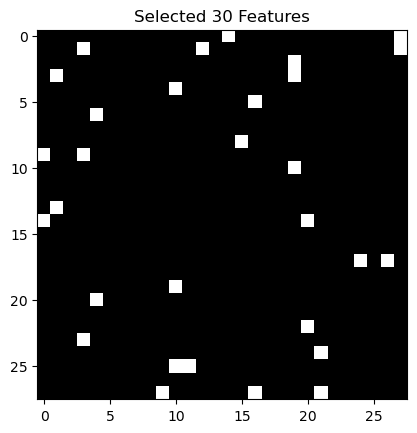

In [6]:
import numpy as np

data = prepare_mnist_data()

# randomly choose 30 features
np.random.seed(0)
selected_features = np.random.choice(data['trainX'].shape[1], 30, replace=False)
data['trainX'] = data['trainX'][:, selected_features]
data['testX'] = data['testX'][:, selected_features]

visualize_features(selected_features)

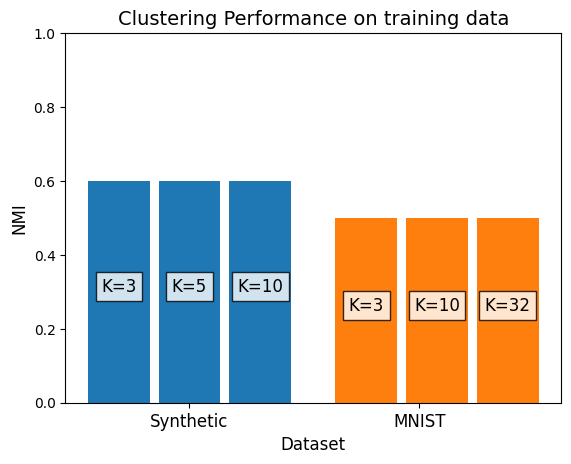

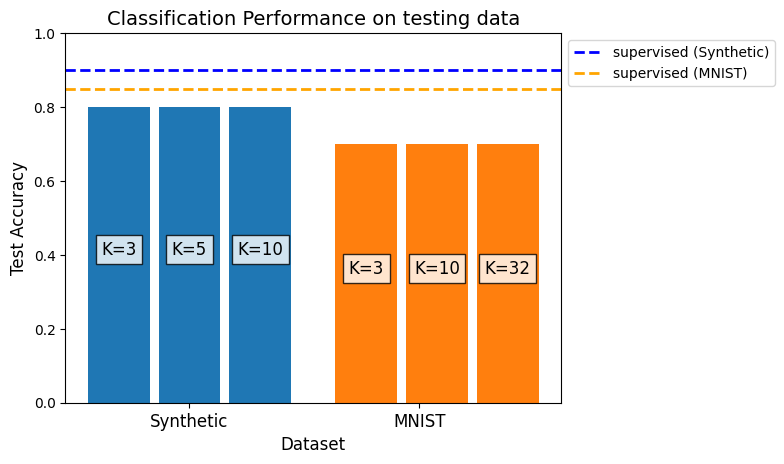

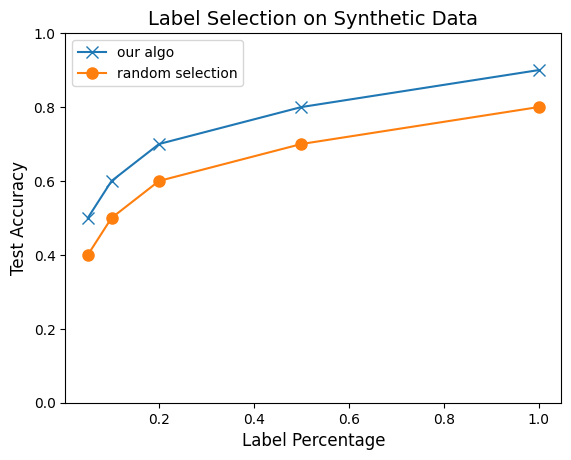

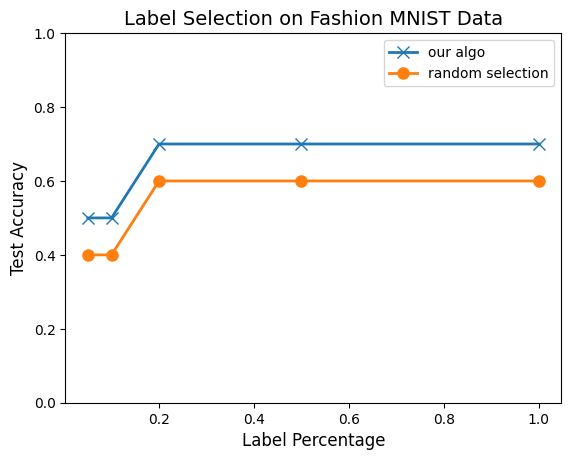

In [ ]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
result1 = {'synthetic_test_accuracy':0.972, 'mnist_test_accuracy':0.85}


# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.6,0.6,0.6], 'classification_accuracy':[0.8,0.8,0.8]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.5,0.5,0.5], 'classification_accuracy':[0.7,0.7,0.7]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)